In [33]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 150)
from scipy import stats


In [34]:
w1 = pd.read_csv('../data/well1.csv')
w2 = pd.read_csv('../data/well2.csv')

def _remove_outlier_z(data, th=3):
    
    s1 = data.shape
    z_score = np.abs(stats.zscore(data))
    idx = np.where(z_score>th)
    data = data.drop(idx[0], axis=0)
    data = data[data>0].dropna()
    data = data.reset_index().drop(['index'], axis=1)
    data = data.sort_values(by=['Hole Depth'], ascending=True)
    s2 = data.shape
    print(f'Shape before removing outliser {s1} \t\t shape after removing the outliers {s2}')
    
    return data        

w1 = _remove_outlier_z(w1, th=3)
w2 = _remove_outlier_z(w2, th=3)

Shape before removing outliser (7999, 21) 		 shape after removing the outliers (7437, 21)
Shape before removing outliser (9091, 21) 		 shape after removing the outliers (8154, 21)


In [35]:
drop = ['Standpipe Pressure', 'Bit Depth', 'Bit RPM', 'Min RPM', 'Min Hook Load', 'Min Pressure', 
       'Line Wear', 'Block Height', 'Time Of Penetration', 'Min WOB']

w1 = w1.drop(drop, axis=1)
w2 = w2.drop(drop, axis=1)

In [36]:
df = pd.concat([w1, w2], axis=0).reset_index().drop(['index'], axis=1)
df.head()

,Hole Depth,Rotary Torque,Rotary RPM,Weight on Bit,Hook Load,Differential Pressure,Inclination,Total Mud Volume,Gamma at Bit,Min Torque,Rate Of Penetration
0,6835,6.690,40.0,15.4,143.4,400.1,23.7,420.7,117.65,3.0,78.44
1,6836,5.791,32.0,14.7,138.2,400.5,23.7,415.5,120.00,4.0,75.28
2,6837,5.166,30.0,12.7,138.7,347.9,23.7,412.0,122.35,4.0,48.82
3,6838,4.922,30.0,12.2,139.2,345.5,23.7,410.3,122.35,4.0,48.92
4,6839,4.810,30.0,11.5,139.6,338.2,23.7,408.9,122.35,4.0,48.73


<IPython.core.display.Javascript object>


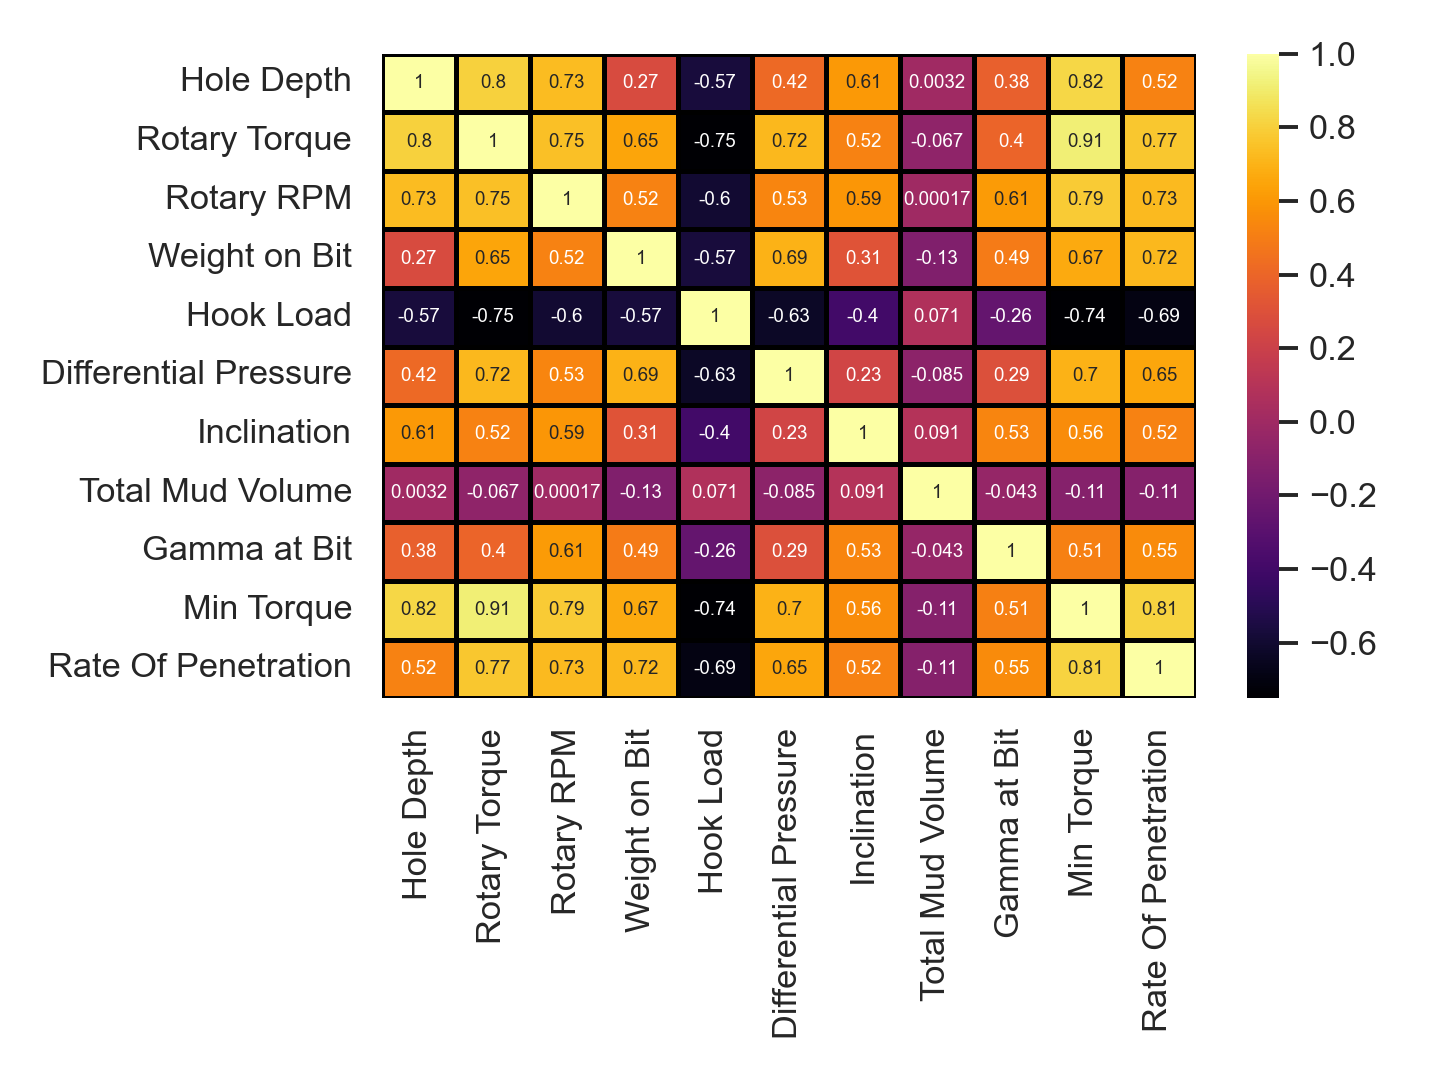

In [37]:
_,ax =  plt.subplots(dpi=120)

sns.heatmap(df.corr(), annot=True,
            cmap='inferno', center=None, robust=False, fmt='.2g', 
            linewidths=1, linecolor='black', cbar=True, ax=ax,
            xticklabels='auto', yticklabels='auto', annot_kws={"fontsize":6})

ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [38]:
def _boxplot(x, ax, label, pos = [1], c1='tab:blue', c2 = 'tab:orange'):
        return ax.boxplot(x, labels=[label], 
                        positions = pos, showfliers=True,
                        patch_artist=True,
                        boxprops=dict(facecolor='w', 
                        color=c1, alpha=1),
                        capprops=dict(color=c1),
                        whiskerprops=dict(color=c1),
                        flierprops=dict(color=c1, markeredgecolor=c1, markersize=1.5),
                        medianprops=dict(color=c2, linewidth=1))


In [39]:
def _data_distribution(var='Weight on Bith', lab ='WOB (klbs)', ax=ax):
    
    B1 = _boxplot(w1[var], ax, label = 'Well 1', pos=[1], c1='tab:blue', c2 = 'black')
    B2 = _boxplot(w2[var], ax, label = 'Well 2', pos=[2], c1='tab:orange', c2 = 'black')
    
    for b1, b2 in zip(B1['boxes'], B2['boxes']):
            # box.set_hatch('////////')
            b1.set_facecolor('tab:blue')
            b2.set_facecolor('tab:orange')
            b1.set_alpha(0.9)
            b2.set_alpha(0.9)
            
    ax.set_ylabel(lab)

    for label in ax.get_xticklabels():
            label.set_ha("center")
            label.set_rotation(0)

    ax.tick_params(axis='x', which='minor', bottom=False, top = False)
    ax.tick_params(axis='x', which='major', bottom=False, top = False)



<IPython.core.display.Javascript object>


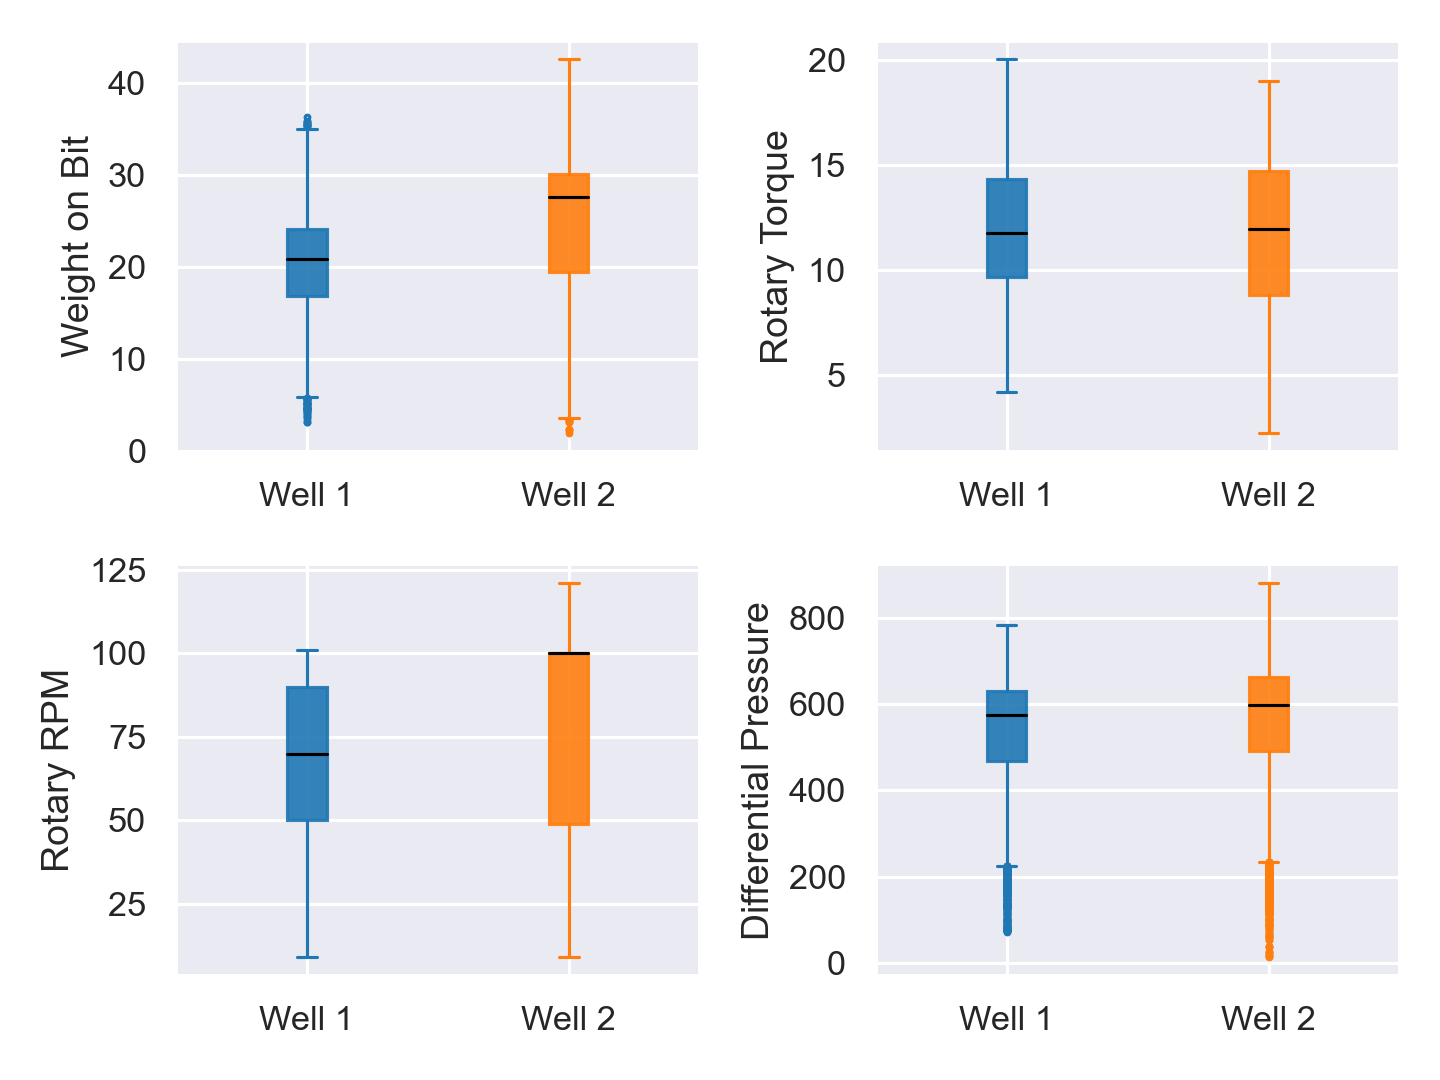

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=120)

_data_distribution(var='Weight on Bit', lab='Weight on Bit', ax=ax[0,0])
_data_distribution(var='Rotary Torque', lab='Rotary Torque', ax=ax[0,1])
_data_distribution(var='Rotary RPM', lab='Rotary RPM', ax=ax[1,0])
_data_distribution(var='Differential Pressure', lab='Differential Pressure', ax=ax[1,1])


plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


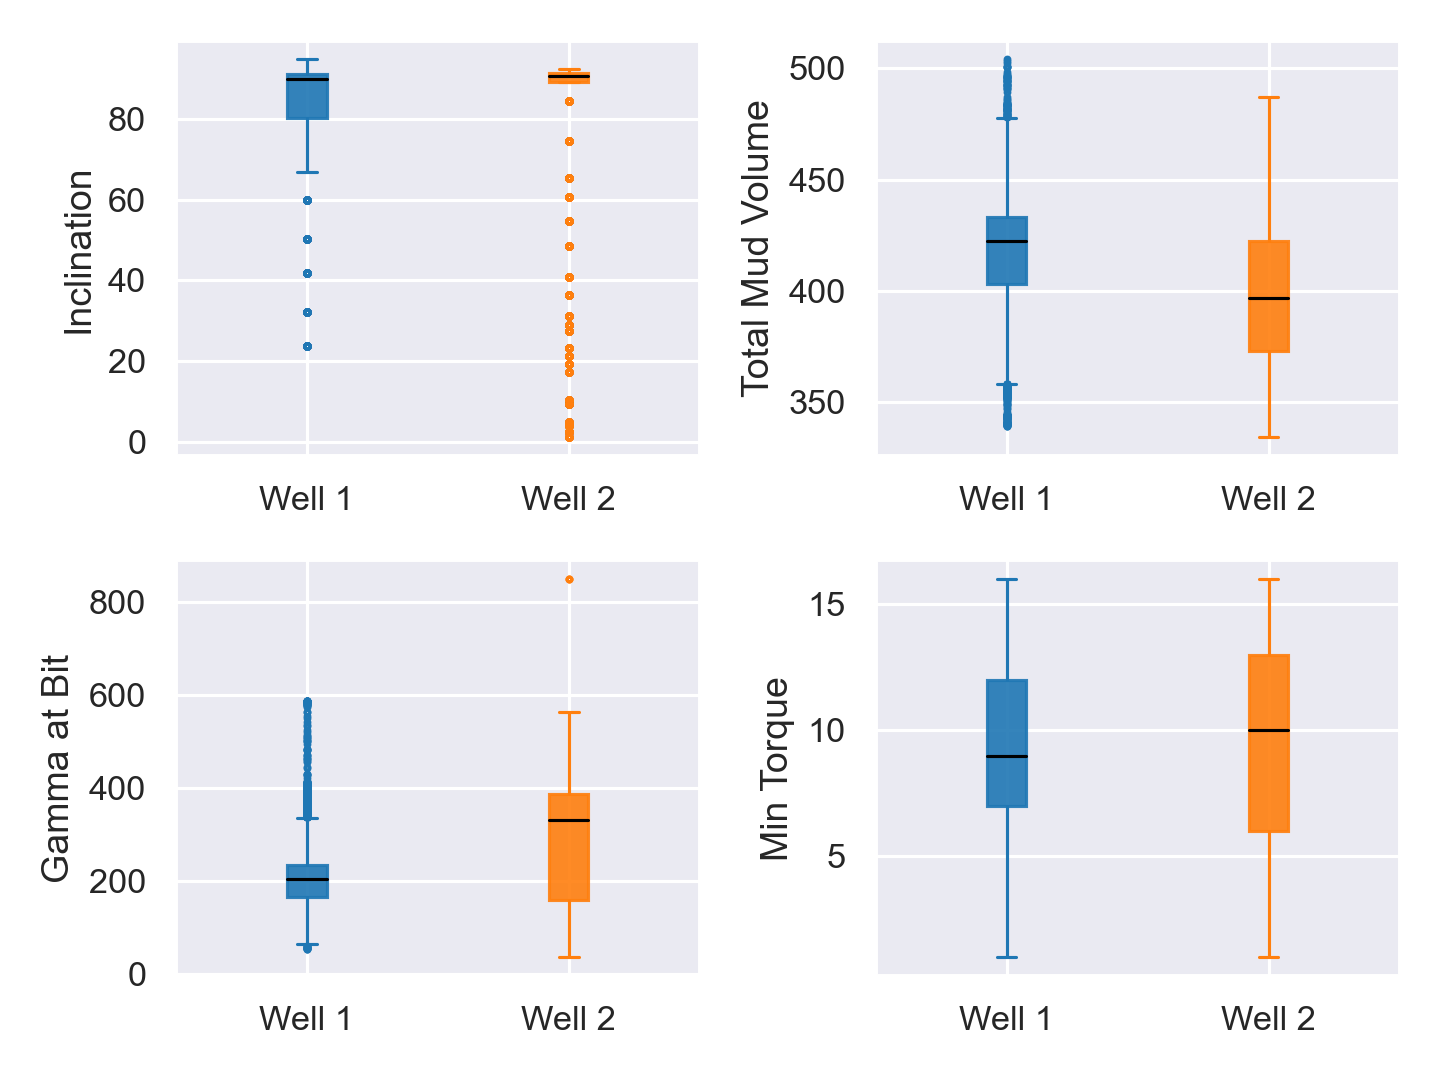

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=120)

_data_distribution(var='Inclination', lab='Inclination', ax=ax[0,0])
_data_distribution(var='Total Mud Volume', lab='Total Mud Volume', ax=ax[0,1])
_data_distribution(var='Gamma at Bit', lab='Gamma at Bit', ax=ax[1,0])
_data_distribution(var='Min Torque', lab='Min Torque', ax=ax[1,1])


plt.tight_layout()
plt.show()

In [42]:
alpha=0.9
def _plot(df1, df2):
        _, ax = plt.subplots(dpi=120, figsize=(14, 4), nrows=2)

        ax[0].plot(df1['Hole Depth'], df1['Rate Of Penetration'], '-', alpha=0.75, linewidth=1,  
                color='tab:blue', label='Well 1')
        ax[0].plot(df2['Hole Depth'], df2['Rate Of Penetration'], '-', alpha=0.75, linewidth=1, 
                color='tab:orange', label='Well 2')
        # ax.invert_yaxis()
        
        ax[0].set_xlabel('Measured Depth (ft)', alpha=alpha, fontsize=12)
        ax[0].set_ylabel('ROP (ft/h)', alpha=alpha, fontsize=12)

        # ax.set_title(title, alpha=0.75)

        l = ax[0].legend(frameon=False, loc='upper left', fontsize=12, ncol=1)
        for text in l.get_texts():
                text.set_alpha(alpha)


        ax[0].tick_params(labelsize=12)

        for text in ax[1].get_xticklabels():
                text.set_alpha(alpha)
                
        for text in ax[1].get_yticklabels():
                text.set_alpha(alpha)

        for t in ax[1].xaxis.get_ticklines():
                t.set_alpha(alpha)

        for t in ax[1].yaxis.get_ticklines():
                t.set_alpha(alpha)
                
        for spine in ['top', 'bottom', 'right', 'left']:
                ax[0].spines[spine].set_alpha(alpha)
                ax[0].spines[spine].set_linewidth(1)
                ax[1].spines[spine].set_alpha(alpha)
                ax[1].spines[spine].set_linewidth(1)

        
        rect = Rectangle((8500, 25), 3000, 260, linewidth=1, edgecolor='tab:gray', 
                        facecolor='none', alpha=alpha, linestyle='--')
        ax[0].add_patch(rect)

        ax[1].plot(df1['Hole Depth'], df1['Rate Of Penetration'], '-', alpha=0.75, linewidth=1,  color='tab:blue', label='True ROP')
        ax[1].plot(df2['Hole Depth'], df2['Rate Of Penetration'], '-', alpha=0.75, linewidth=1,  color='tab:orange', label='Predicted ROP')
        # ax.invert_yaxis()
        ax[1].set_xlim([8500, 11500])
        ax[1].set_xlabel('Measured Depth (ft)', alpha=alpha, fontsize=12)
        ax[1].set_ylabel('ROP (ft/h)', alpha=alpha, fontsize=12)

        ax[0].set_ylim([0,300])
        ax[1].set_ylim([0,300])
        ax[1].tick_params(labelsize=12)
        plt.tight_layout()

        
        plt.show()


<IPython.core.display.Javascript object>


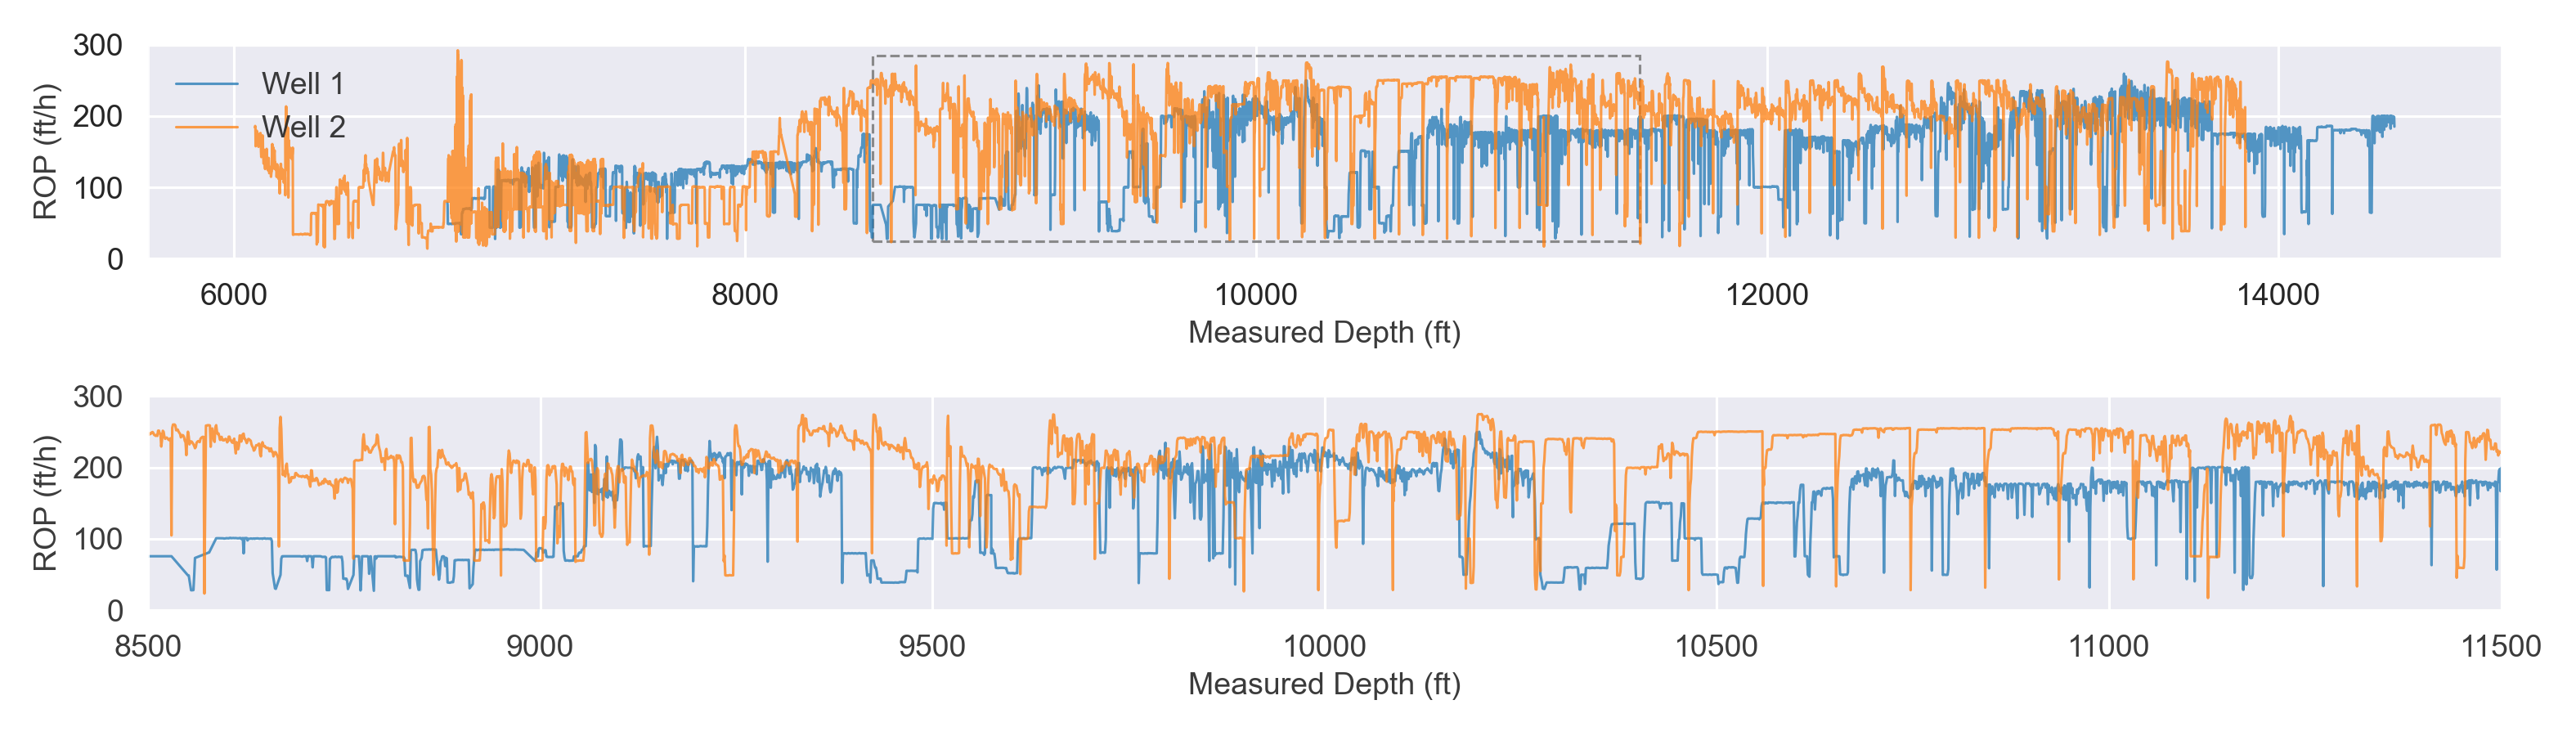

In [43]:
_plot(w1, w2)